In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.40, random_state=0)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


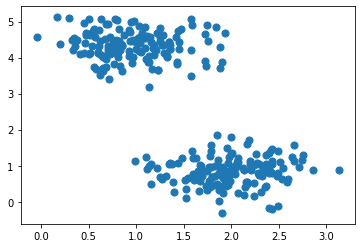

In [2]:

plt.scatter(X[:, 0], X[:, 1], s=50);
#plt.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/mL/images/SVC/slides/unclassify.png')

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

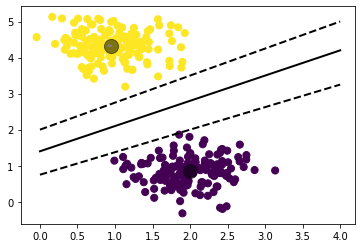

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.plot([0, 4], [1.4, 4.2], 'k-', lw=2)
plt.plot([0, 4], [.75, 3.25], 'k-', linestyle='dashed', lw=2)
plt.plot([0, 4], [2, 5], 'k-', linestyle='dashed', lw=2)
#plt.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/mL/images/SVC/slides/classify.png')

Text(0.5, 0, 'x')

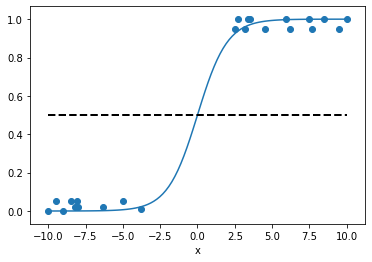

In [5]:
import math 
  
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 

X = np.array([-10,-9.5, -9, -8.5,-6.3, -3.8, -8.2, -8.1, -8, -5, 2.5, 2.7, 3.2, 
              3.4, 3.5, 4.5, 5.9, 6.2, 7.5, 7.7, 8.5, 9.5,10])
Y = np.array([0,.05,0,.05,.02,.01, .02,.05,.02,.05,.95,1,.95,1,1,.95,1,.95,1,.95,1,.95,1])
plt.plot(x, z) 
plt.plot([-10, 10], [.5, .5], 'k-', lw=2, linestyle='dashed')
plt.scatter(X,Y)
plt.xlabel("x") 
#plt.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/mL/images/SVC/slides/log.png')

In [59]:

from sklearn.datasets import make_regression
from matplotlib import pyplot
from pandas import DataFrame
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=24,tail_strength=1)
                      


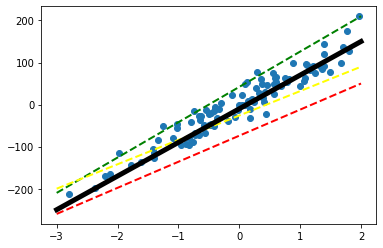

In [75]:
plt.scatter(X,y)
plt.plot([-3, 2], [-210, 210], 'k-', lw=2, linestyle='dashed', color='green')
plt.plot([-3, 2], [-260, 50], 'k-', lw=2, linestyle='dashed', color='red')
plt.plot([-3, 2], [-200, 90], 'k-', lw=2, linestyle='dashed', color='yellow')
plt.plot([-3, 2], [-250, 150], 'k-', lw=5)
plt.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/mL/images/SVC/slides/ridge.png')

In [9]:
import matplotlib.pyplot as plt
import sys
import os
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir = thisDir + 'output/mL/'

df=pd.read_csv(outDir+'results/SVC/acc/CV/acc.csv')
df= pd.melt(df, value_vars=['mixed','motor','mem'], var_name='task', value_name='acc')

In [10]:
df.head()

,task,acc
0,mixed,0.95
1,mixed,0.95
2,mixed,1.00
3,mixed,1.00
4,mixed,1.00


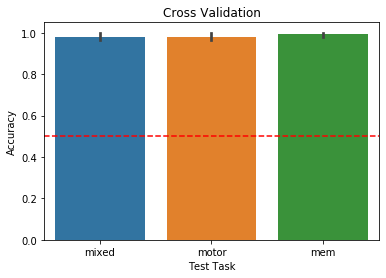

In [16]:
ax=sns.barplot(x='task', y='acc', data=df)
ax.axhline(.50, ls='--', color='r')
ax.set_title('Cross Validation')
ax.set_xlabel('Test Task')
ax.set_ylabel('Accuracy')
plt.savefig(outDir +'images/SVC/slides/CV_boxplot.png', bbox_inches='tight')

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/'
import results


import pandas as pd
df=pd.read_csv(outDir+'results/ridge/acc/DS/acc.csv', usecols=[1,2,3,4])
#df.set_index('task', inplace=True)
#df.rename(index={'mixed':'Mixed','motor':'Motor','mem':'Memory'}, inplace=True)
#df.reset_index(inplace=True)

subject by subject heatmap


/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


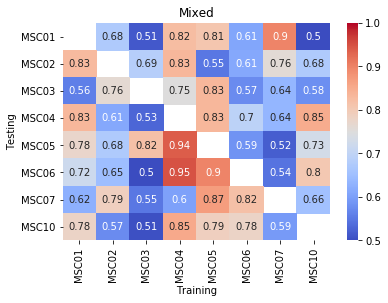

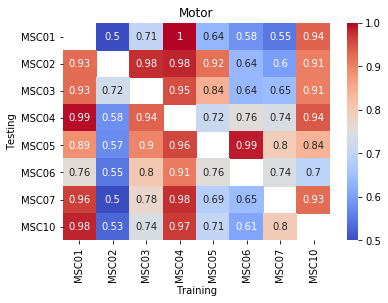

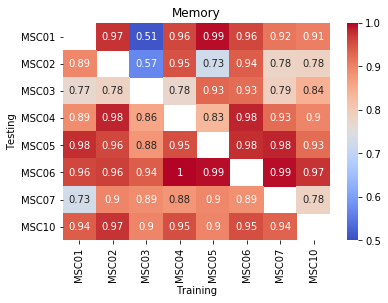

In [2]:
import results
#results.heatmaps('ridge', 'SS')
#results.heatmaps('ridge', 'BS')
#results.boxACC(finalDF, 'ridge', 'CV')
#results.boxACC(df, 'ridge', 'DS')
results.plotACC(df, 'ridge', 'DS')

In [11]:
import numpy as np
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/results/ridge/acc/'


taskList=['mixed','mem','motor']
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']

motor=pd.DataFrame()
mixed=pd.DataFrame()
mem=pd.DataFrame()
#DS
for train in subList:
    for test in subList:
        if train==test:
            continue
        #motor
        tmpmotor=pd.read_csv(outDir+'DS/folds/'+train+test+'motor.csv',usecols=[1,2,3])
        motor=pd.concat([motor,tmpmotor])
        #mixed
        tmpmix=pd.read_csv(outDir+'DS/folds/'+train+test+'mixed.csv',usecols=[1,2,3])
        mixed=pd.concat([mixed,tmpmix])
        #mem
        tmpmem=pd.read_csv(outDir+'DS/folds/'+train+test+'mem.csv',usecols=[1,2,3])
        mem=pd.concat([mem,tmpmem])
        
motMix=pd.merge(motor,mixed,on=['train', 'test'])        
DS=pd.merge(motMix,mem,on=['train', 'test'])   
DS.rename(columns={'mixed':'Mixed','motor':'Motor','mem':'Memory'}, inplace=True)

#DS.drop(columns={'train','test'},inplace=True)
DS_violin=pd.melt(DS, id_vars=['train','test'],value_vars=['Motor','Mixed','Memory'], var_name='task', value_name='acc')
#DS_violin['Analysis']='Diff Sub'

DS_violin.to_csv(outDir+'DS/folds/allFolds.csv', index=False)

In [8]:
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
taskList=['mixed','mem','motor']
def refine_acc(sub):
    sub_tmp=pd.DataFrame()
    #for i in subList:
    #    if sub==i:
    #        continue
    for train in taskList:
        for test in taskList:
            if train==test:
                continue
            tmp=pd.read_csv(outDir+'SS/folds/'+train+test+sub+'.csv',usecols=[1,2,3])
            sub_tmp=pd.concat([sub_tmp,tmp])
    #return sub_tmp
    sub_tmp.to_csv(outDir+'SS/folds/'+sub+'.csv', index=False)

In [11]:
#BS
BS=pd.DataFrame()
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
for sub in subList:
    tmp=pd.read_csv(outDir+'BS/folds/'+sub+'.csv')
    BS=pd.concat([BS,tmp])
BS.to_csv(outDir+'BS/folds/allFolds.csv', index=False)

In [24]:
SS=pd.DataFrame()
for sub in subList:
    tmp=pd.read_csv(outDir+'SS/folds/'+sub+'.csv')
    tmp=pd.melt(tmp, id_vars=['train','test'], value_vars=[sub], var_name='sub', value_name='acc')
    SS=pd.concat([SS,tmp])
SS.to_csv(outDir+'SS/folds/allFolds.csv', index=False)

In [1]:
import numpy as np
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/results/ridge/acc/'

In [46]:
CV=pd.read_csv(outDir+'CV/reformedFolds.csv')
CV.drop(columns='sub', inplace=True)
CV['Analysis']='Same Sub'
frames=[DS_violin, CV]
result=pd.concat(frames)

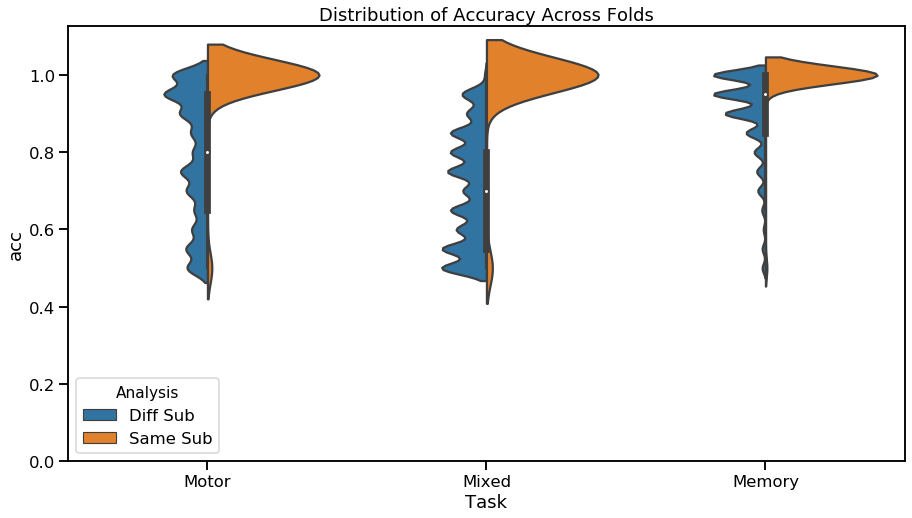

In [55]:
sns.set_context('talk')
plt.figure(figsize=(15,8))
g=sns.violinplot(x='task', y='acc', hue='Analysis', data=result, split=True)
g.set_xlabel('Task')
g.set(ylim=(0))
g.set_title('Distribution of Accuracy Across Folds')
plt.savefig(thisDir +'output/mL/images/ridge/acc/CV/violinplots.png', bbox_inches='tight')

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ptitprince as pt
%matplotlib inline
import os
import sys
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/results/ridge/acc/'
#SS
SS=pd.read_csv(outDir+'SS/folds/allFolds.csv')
SS.drop(columns='test', inplace=True)
#reformate to get in long form
SS=SS.pivot_table(index = ['train',
                        SS.groupby(['train','sub']).cumcount()],
               columns = 'sub',
               values = 'acc')

SS.reset_index(inplace=True)
SS.drop(columns='level_1',inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called Gri

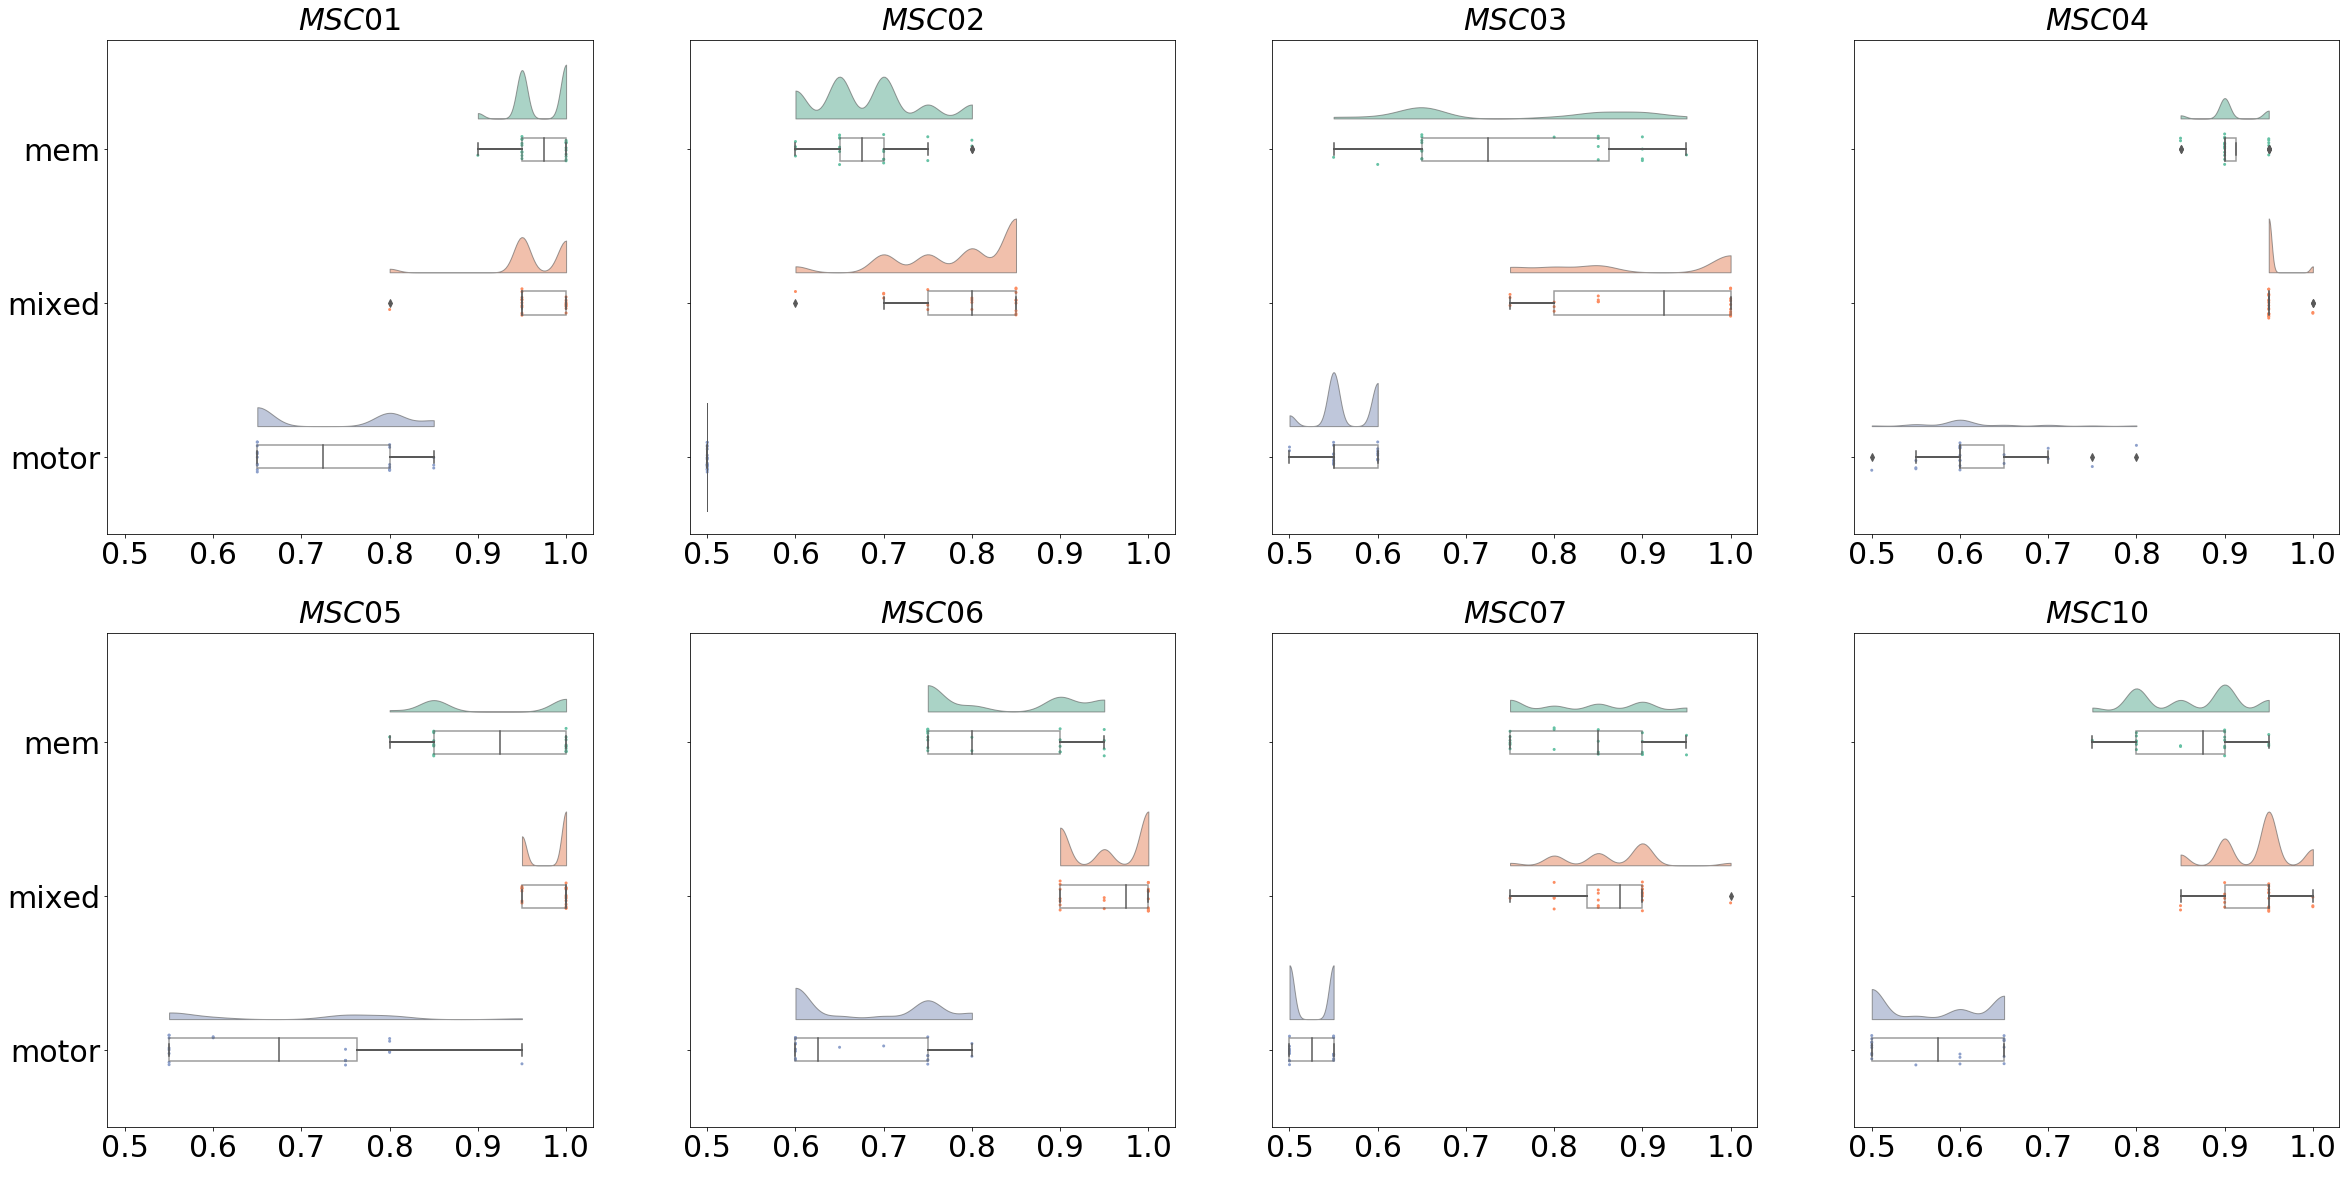

In [68]:


#Create figure space
fig=plt.figure(figsize=(40,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 4 columns
gs = gridspec.GridSpec(nrows=2, ncols=4)
#gs = gridspec.GridSpec(nrows=4, ncols=2)
#MSC01
ax1=fig.add_subplot(gs[0,0])
dx='train'; dy='MSC01'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax1)
ax.tick_params(labelsize=30)
ax.set_title('$MSC01$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC02
ax2=fig.add_subplot(gs[0,1], sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
dx='train'; dy='MSC02'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax2)
ax.tick_params(labelsize=30)
ax.set_title('$MSC02$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC03
ax3=fig.add_subplot(gs[0,2], sharey=ax1)
#ax3=fig.add_subplot(gs[1,0], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
dx='train'; dy='MSC03'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax3)
ax.tick_params(labelsize=30)
ax.set_title('$MSC03$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC04
ax4=fig.add_subplot(gs[0,3], sharey=ax1)
#ax4=fig.add_subplot(gs[1,1], sharey=ax1)
plt.setp(ax4.get_yticklabels(), visible=False)
dx='train'; dy='MSC04'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax4)
ax.tick_params(labelsize=30)
ax.set_title('$MSC04$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)


#MSC05
ax5=fig.add_subplot(gs[1,0])
#ax5=fig.add_subplot(gs[2,0])
dx='train'; dy='MSC05'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax5)
ax.tick_params(labelsize=30)
ax.set_title('$MSC05$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC06
ax6=fig.add_subplot(gs[1,1], sharey=ax5)
#ax6=fig.add_subplot(gs[2,1], sharey=ax5)
plt.setp(ax6.get_yticklabels(), visible=False)
dx='train'; dy='MSC06'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax6)
ax.tick_params(labelsize=30)
ax.set_title('$MSC06$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC07
ax7=fig.add_subplot(gs[1,2], sharey=ax5)
#ax7=fig.add_subplot(gs[3,0], sharey=ax5)
plt.setp(ax7.get_yticklabels(), visible=False)
dx='train'; dy='MSC07'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax7)
ax.tick_params(labelsize=30)
ax.set_title('$MSC07$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC10
ax8=fig.add_subplot(gs[1,3], sharey=ax5)
#ax8=fig.add_subplot(gs[3,1], sharey=ax5)
plt.setp(ax8.get_yticklabels(), visible=False)
dx='train'; dy='MSC10'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax8)
ax.tick_params(labelsize=30)
ax.set_title('$MSC10$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)



plt.savefig(thisDir+'output/mL/images/ridge/acc/SS/raincloud_plots.png', bbox_inches='tight')